First 5 rows of the dataset:
Empty DataFrame
Columns: [Channel Title, Channel Username, ID, Message, Date, Media Path]
Index: []

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Channel Title     0 non-null      object
 1   Channel Username  0 non-null      object
 2   ID                0 non-null      object
 3   Message           0 non-null      object
 4   Date              0 non-null      object
 5   Media Path        0 non-null      object
dtypes: object(6)
memory usage: 132.0+ bytes

Missing Values in Each Column:
Channel Title       0
Channel Username    0
ID                  0
Message             0
Date                0
Media Path          0
dtype: int64

No missing values to plot.

Descriptive Statistics of Numerical Columns:
       Channel Title Channel Username   ID Message Date Media Path
count              0      

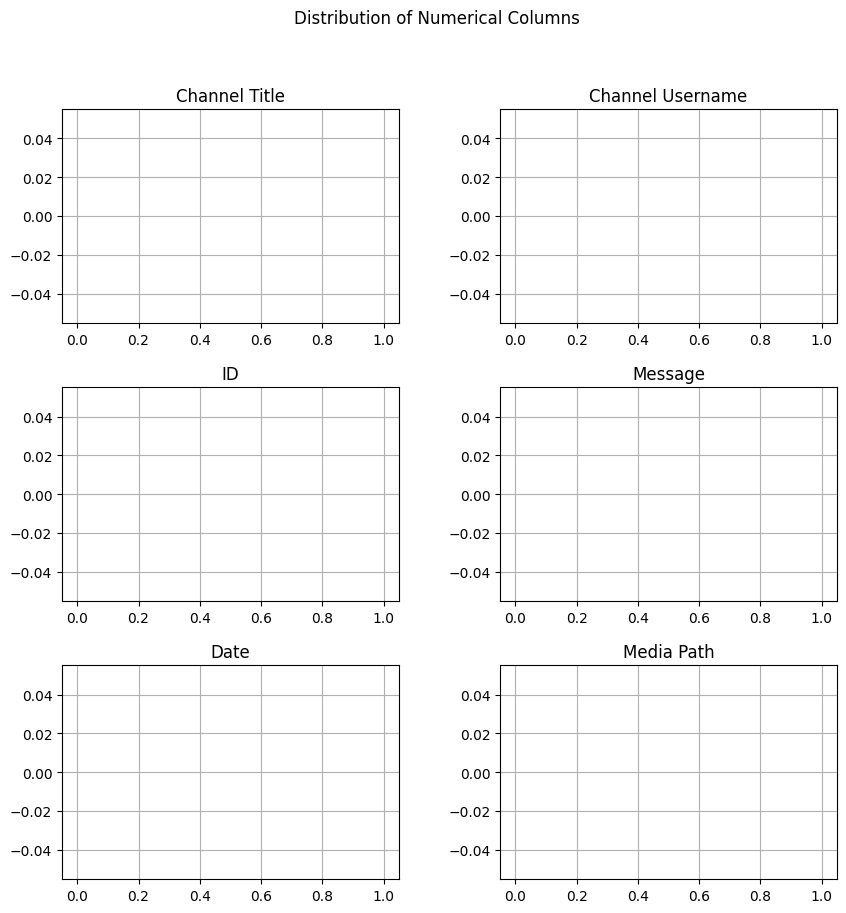

d:\Projects\SolomonProjects\Kifiya\week 7\week-7\venv\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
d:\Projects\SolomonProjects\Kifiya\week 7\week-7\venv\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


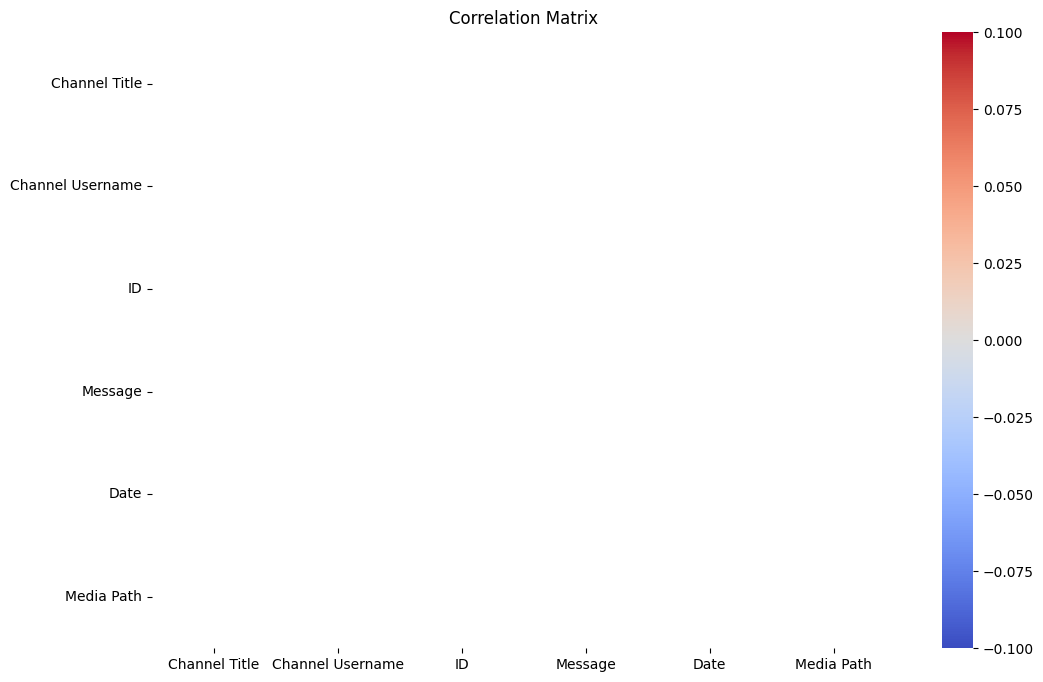


Number of duplicate rows: 0

Cleaned data saved as 'telegram_scrapped_data_cleaned.csv'

Final dataset shape after cleaning:
(0, 6)

EDA Completed.


In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the scraped data
df = pd.read_csv('../data/telegram_scraped_data.csv')

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Check the basic information of the dataset
print("\nDataset Information:")
df.info()

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)

# Visualizing Missing Data Heatmap
if df.isnull().values.any():
    plt.figure(figsize=(10,6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Data Heatmap')
    plt.show()
else:
    print("\nNo missing values to plot.")

# Descriptive statistics
print("\nDescriptive Statistics of Numerical Columns:")
print(df.describe())

# Checking column types and converting to appropriate formats if needed
# Convert columns to numeric or datetime if they seem to be wrongly inferred
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except ValueError:
        pass  # Ignore conversion errors (non-numeric columns)
    try:
        df[col] = pd.to_datetime(df[col])
    except ValueError:
        pass  # Ignore conversion errors (non-datetime columns)

# Checking again for numerical and datetime columns
numerical_columns = df.select_dtypes(include=['number', 'datetime']).columns

# Visualizing the distribution of numerical columns
if len(numerical_columns) > 0:
    df[numerical_columns].hist(figsize=(10,10), bins=20, color='blue')
    plt.suptitle('Distribution of Numerical Columns')
    plt.show()
else:
    print("\nNo numerical or datetime columns available for histogram.")

# Correlation Matrix (if numerical columns exist)
if len(numerical_columns) > 0:
    plt.figure(figsize=(12, 8))
    sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()
else:
    print("\nNo numerical columns to plot correlation matrix.")

# Checking for duplicates
duplicate_rows = df[df.duplicated()]
print(f"\nNumber of duplicate rows: {len(duplicate_rows)}")

# Dropping duplicates if any
df.drop_duplicates(inplace=True)

# Save the cleaned dataset
df.to_csv('../data/telegram_scrapped_data_cleaned.csv', index=False)
print("\nCleaned data saved as 'telegram_scrapped_data_cleaned.csv'")

# Summary
print("\nFinal dataset shape after cleaning:")
print(df.shape)
print("\nEDA Completed.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Channel Title     0 non-null      object
 1   Channel Username  0 non-null      object
 2   ID                0 non-null      object
 3   Message           0 non-null      object
 4   Date              0 non-null      object
 5   Media Path        0 non-null      object
dtypes: object(6)
memory usage: 132.0+ bytes
Number of duplicate rows: 0
No missing data to visualize.


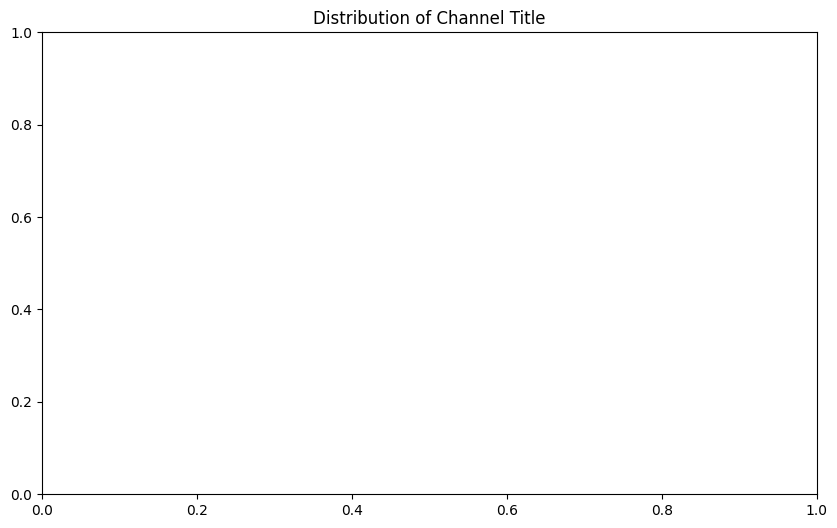

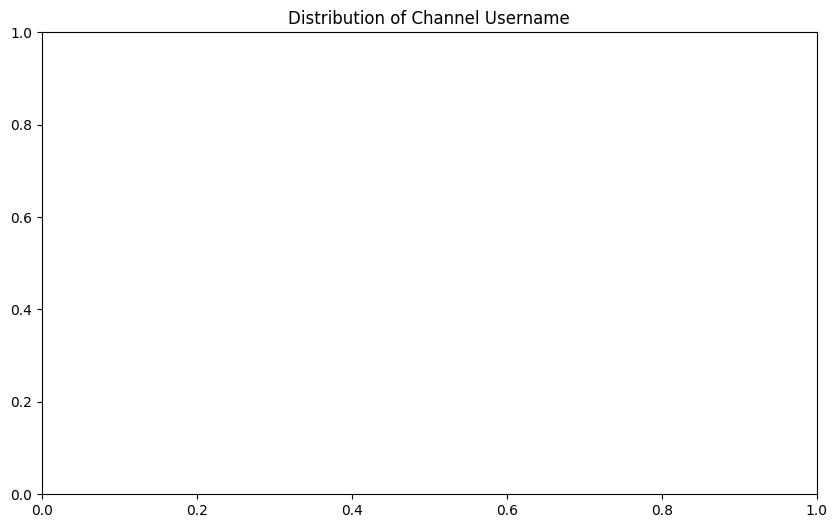

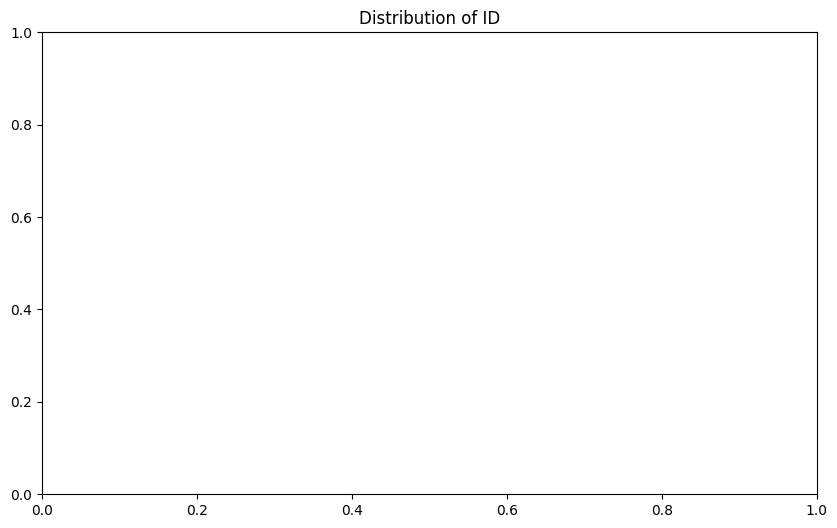

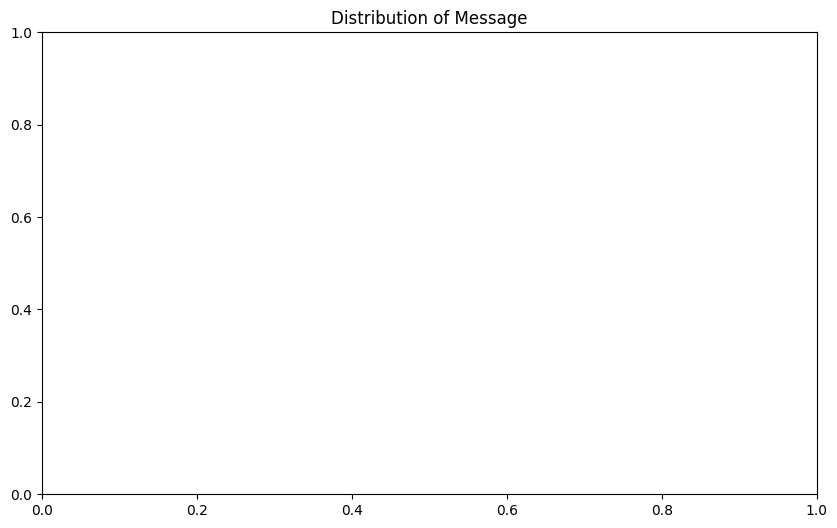

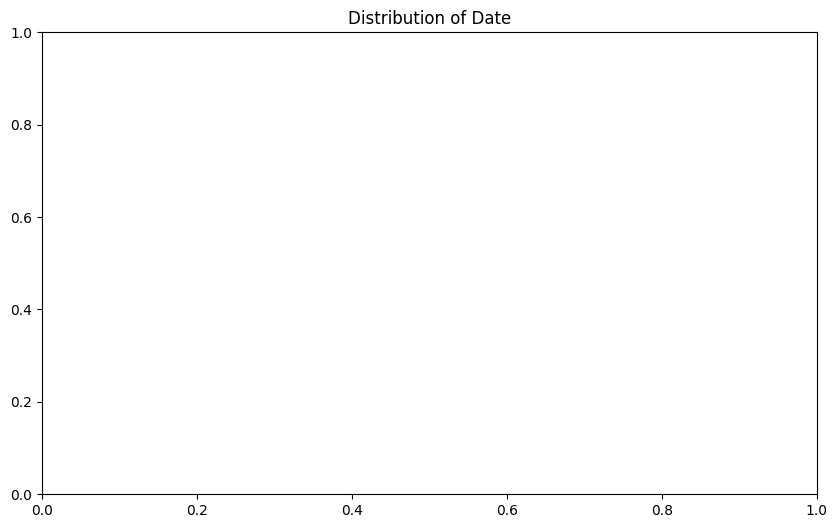

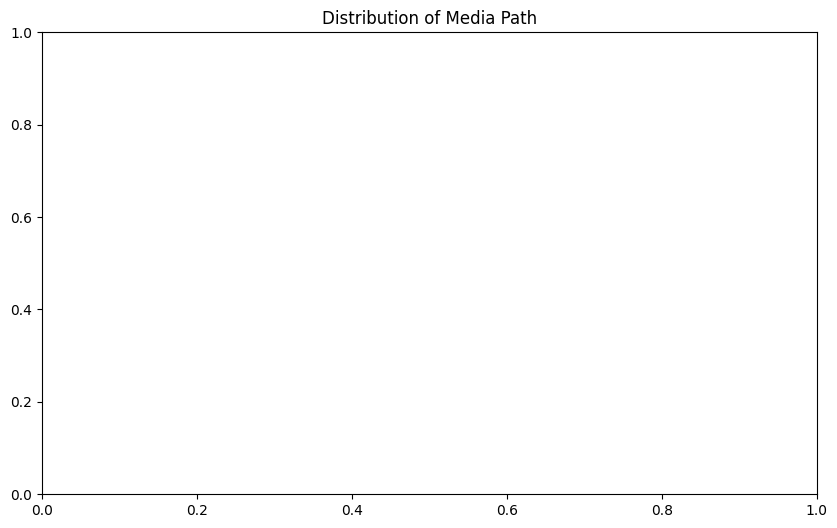

ValueError: hist method requires numerical or datetime columns, nothing to plot.

In [4]:
# task-1.ipynb

# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load the scraped data
file_path = '../data/telegram_scraped_data.csv'
df = pd.read_csv(file_path)

# 3. Overview of the data
# Display the first few rows of the dataset
df.head()

# Check for missing values
df.isnull().sum()

# Display the basic statistics of numerical columns
df.describe()

# 4. Data Information
# Display information about the dataset, such as data types and non-null counts
df.info()

# 5. Check for duplicates
# Identify if there are any duplicate entries
duplicate_rows = df[df.duplicated()]
print(f'Number of duplicate rows: {len(duplicate_rows)}')

# 6. Visualizing Missing Data (only if there are missing values)
if df.isnull().sum().sum() > 0:
    plt.figure(figsize=(10,6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Data Heatmap')
    plt.show()
else:
    print("No missing data to visualize.")

# 7. Data Distribution
# Visualizing the distribution of categorical columns
for column in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10,6))
    sns.countplot(y=column, data=df, palette='Set2')
    plt.title(f'Distribution of {column}')
    plt.show()

# Visualizing the distribution of numerical columns
df.hist(figsize=(10,10), bins=20, color='blue')
plt.suptitle('Distribution of Numerical Columns')
plt.show()

# 8. Handling missing values (simple example - can be refined based on data)
# Fill missing values in categorical columns with 'Unknown'
df.fillna('Unknown', inplace=True)

# 9. Correlation Matrix for numerical columns
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=1)
plt.title('Correlation Matrix')
plt.show()

# 10. Save cleaned data for further processing in later tasks
df.to_csv('../data/cleaned_telegram_data.csv', index=False)
